EXPERIMENT 1

In [ ]:
total=int(input("Enter no. of bananas at starting: "))
distance=int(input("Enter distance you want to cover: "))
load_capacity=int(input("Enter max load capacity of your camel: "))
lose=0
start=total
for i in range(distance):
  while start>0:
    start=start-load_capacity

    if start==1:
      lose=lose-1
    lose=lose+2

  lose=lose-1
  start=total-lose
  if start==0:
    break
print(start)

Enter no. of bananas at starting: 3000
Enter distance you want to cover: 1000
Enter max load capacity of your camel: 1000
533


EXPERIMENT 2

In [1]:
def addEdge(adj, v, w):
    adj[v].append(w)
    adj[w].append(v)
    return adj

def greedyColoring(adj, V):
    result = [-1] * V
    result[0] = 0
    available = [False] * V

    for u in range(1, V):
        for i in adj[u]:
            if result[i] != -1:
                available[result[i]] = True

        cr = 0
        while cr < V:
            if not available[cr]:
                break
            cr += 1

        result[u] = cr

        for i in adj[u]:
            if result[i] != -1:
                available[result[i]] = False

    for u in range(V):
        print("Vertex", u, "---> Color", result[u])

if __name__ == '__main__':
    g1 = [[] for _ in range(5)]
    g1 = addEdge(g1, 0, 1)
    g1 = addEdge(g1, 0, 2)
    g1 = addEdge(g1, 1, 2)
    g1 = addEdge(g1, 1, 3)
    g1 = addEdge(g1, 2, 3)
    g1 = addEdge(g1, 3, 4)
    print("Coloring of graph 1")
    greedyColoring(g1, 5)

    g2 = [[] for _ in range(5)]
    g2 = addEdge(g2, 0, 1)
    g2 = addEdge(g2, 0, 2)
    g2 = addEdge(g2, 1, 2)
    g2 = addEdge(g2, 1, 4)
    g2 = addEdge(g2, 2, 4)
    g2 = addEdge(g2, 4, 3)
    print("\nColoring of graph 2")
    greedyColoring(g2, 5)


Coloring of graph 1
Vertex 0 ---> Color 0
Vertex 1 ---> Color 1
Vertex 2 ---> Color 2
Vertex 3 ---> Color 0
Vertex 4 ---> Color 1

Coloring of graph 2
Vertex 0 ---> Color 0
Vertex 1 ---> Color 1
Vertex 2 ---> Color 2
Vertex 3 ---> Color 0
Vertex 4 ---> Color 3


EXPERIMENT 3

In [2]:
import time
import itertools

def timeit(fn):
    def wrapper():
        start = time.time()
        ret = fn()
        elapsed = time.time() - start
        print("%s took %.2fs" % (fn.__name__, elapsed))
        return ret
    return wrapper

def solve1():
    for perm in itertools.permutations(range(10), 7):
        b, a, s, e, l, g, m = perm
        if b == 0:  # Skip permutations where 'b' is 0
            continue

        base = 1000 * b + 100 * a + 10 * s + e
        ball = 1000 * b + 100 * a + 10 * l + l
        games = 10000 * g + 1000 * a + 100 * m + 10 * e + s

        if base + ball == games and distinct(b, a, s, e, l, g, m):
            return base, ball, games

def solve2():
    letters = ('b', 'a', 's', 'e', 'l', 'g', 'm')
    for perm in itertools.permutations(range(10), len(letters)):
        sol = dict(zip(letters, perm))
        if sol['b'] == 0:  # Skip permutations where 'b' is 0
            continue

        base = 1000 * sol['b'] + 100 * sol['a'] + 10 * sol['s'] + sol['e']
        ball = 1000 * sol['b'] + 100 * sol['a'] + 10 * sol['l'] + sol['l']
        games = 10000 * sol['g'] + 1000 * sol['a'] + 100 * sol['m'] + 10 * sol['e'] + sol['s']

        if base + ball == games:
            return base, ball, games

def distinct(*args):
    return len(set(args)) == len(args)

@timeit
def run_solve1():
    return solve1()

@timeit
def run_solve2():
    return solve2()

print("Solution 1:")
print(run_solve1())

print("\nSolution 2:")
print(run_solve2())


Solution 1:
run_solve1 took 0.08s
(2461, 2455, 4916)

Solution 2:
run_solve2 took 0.20s
(2461, 2455, 4916)


EXPERIMENT 4- BFS AND DFS

In [ ]:
graph = {
  'A': ['B', 'C'],
  'B': ['D', 'E'],
  'C': ['F'],
  'D': [],
  'E': ['F'],
  'F': []
}
visited_bfs = []
queue = []

def bfs(visited_bfs, graph, node):
  visited_bfs.append(node)
  queue.append(node)
  iterations = 0
  while queue:
    iterations += 1
    s = queue.pop(0)
    print(s, end=" ")
    for neighbour in graph[s]:
      if neighbour not in visited_bfs:
        visited_bfs.append(neighbour)
        queue.append(neighbour)
  return iterations

visited = set()

def dfs(visited, graph, node):
  if node not in visited:
    print(node, end=" ")
    visited.add(node)
    iterations = 1
    for neighbour in graph[node]:
      iterations += dfs(visited, graph, neighbour)
    return iterations
  else:
      return 0
print("BFS:", end=" ")
bfs_iterations = bfs(visited_bfs, graph, 'A')
print('\nNumber of BFS Iterations:', bfs_iterations)
print("\nDFS:", end=" ")
dfs_iterations = dfs(visited, graph, 'A')
print('\nNumber of DFS Iterations:', dfs_iterations)

BFS: A B C D E F 
Number of BFS Iterations: 6

DFS: A B D E F C 
Number of DFS Iterations: 6


EXPERIMENT 5- BEST FIRST SEARCH & A* ALGORITHM

In [ ]:
from queue import PriorityQueue


class Graph:
    def __init__(self, adjacency_list):
        self.adjacency_list = adjacency_list

    def get_neighbors(self, v):
        return self.adjacency_list[v]

    def h(self, n):
        H = {
            'A': 1,
            'B': 1,
            'C': 1,
            'D': 1
        }

        return H[n]

    def best_first_search(self, start, goal):
        explored = []
        pq = PriorityQueue()
        pq.put((0, start))
        parents = {start: None}

        while not pq.empty():
            current = pq.get()[1]

            if current == goal:
                path = []
                while current is not None:
                    path.append(current)
                    current = parents[current]
                path.reverse()
                print(f"Best-First Search path: {path}")
                return path

            explored.append(current)

            for neighbor, weight in self.get_neighbors(current):
                if neighbor not in explored and neighbor not in [i[1] for i in pq.queue]:
                    parents[neighbor] = current
                    pq.put((self.h(neighbor), neighbor))

        print("Path not found!")
        return None

    def a_star_algorithm(self, start_node, stop_node):
        open_list = set([start_node])
        closed_list = set([])
        g = {}

        g[start_node] = 0
        parents = {}
        parents[start_node] = start_node

        while len(open_list) > 0:
            n = None
            for v in open_list:
                if n == None or g[v] + self.h(v) < g[n] + self.h(n):
                    n = v

            if n == None:
                print('Path does not exist!')
                return None
            if n == stop_node:
                reconst_path = []

                while parents[n] != n:
                    reconst_path.append(n)
                    n = parents[n]

                reconst_path.append(start_node)

                reconst_path.reverse()

                print('A* path: {}'.format(reconst_path))
                return reconst_path

            for (m, weight) in self.get_neighbors(n):
                if m not in open_list and m not in closed_list:
                    open_list.add(m)
                    parents[m] = n
                    g[m] = g[n] + weight
                else:
                    if g[m] > g[n] + weight:
                        g[m] = g[n] + weight
                        parents[m] = n

                        if m in closed_list:
                            closed_list.remove(m)
                            open_list.add(m)
            open_list.remove(n)
            closed_list.add(n)

        print('Path does not exist!')
        return None


adjacency_list = {
    'A': [('B', 1), ('C', 3), ('D', 7)],
    'B': [('D', 5)],
    'C': [('D', 12)]
}
graph1 = Graph(adjacency_list)
graph1.best_first_search('A', 'D')
graph1.a_star_algorithm('A', 'D')

Best-First Search path: ['A', 'D']
A* path: ['A', 'B', 'D']


['A', 'B', 'D']

EXPERIMENT 6- UNCERTAIN METHODS

In [ ]:
MAX, MIN = 1000, -1000

def minimax(depth, nodeIndex, maximizingPlayer, values, alpha, beta):
    if depth == 3:
        return values[nodeIndex]
    if maximizingPlayer:
        best = MIN
        for i in range(0, 2):
            val = minimax(depth + 1, nodeIndex * 2 + i, False, values, alpha, beta)
            best = max(best, val)
            alpha = max(alpha, best)
            if beta <= alpha:
                break
        return best
    else:
        best = MAX
        for i in range(0, 2):
            val = minimax(depth + 1, nodeIndex * 2 + i, True, values, alpha, beta)
            best = min(best, val)
            beta = min(beta, best)
            if beta <= alpha:
                break
        return best

if __name__ == "__main__":
    values = []
    for i in range(0, 8):
        x = int(input(f"Enter Value {i} : "))
        values.append(x)
    print("The optimal value is :", minimax(0, 0, True, values, MIN, MAX))
t

Enter Value 0 : 1
Enter Value 1 : 2
Enter Value 2 : 3
Enter Value 3 : 4
Enter Value 4 : 5
Enter Value 5 : 6
Enter Value 6 : 7
Enter Value 7 : 8
The optimal value is : 6


EXPERIEMENT 7- UNIFICATION AND RESOLUTION


In [13]:
import copy
import time

class Parameter:
    variable_count = 1

    def __init__(self, name=None):
        if name:
            self.type = "Constant"
            self.name = name
        else:
            self.type = "Variable"
            self.name = "v" + str(Parameter.variable_count)
            Parameter.variable_count += 1

    def isConstant(self):
        return self.type == "Constant"

    def unify(self, type_, name):
        self.type = type_
        self.name = name

    def __eq__(self, other):
        return self.name == other.name

    def __str__(self):
        return self.name

class Predicate:
    def __init__(self, name, params):
        self.name = name
        self.params = params

    def __eq__(self, other):
        return self.name == other.name and all(a == b for a, b in zip(self.params, other.params))

    def __str__(self):
        return self.name + "(" + ",".join(str(x) for x in self.params) + ")"

    def getNegatedPredicate(self):
        return Predicate(negatePredicate(self.name), self.params)

class Sentence:
    sentence_count = 0

    def __init__(self, string):
        self.sentence_index = Sentence.sentence_count
        Sentence.sentence_count += 1
        self.predicates = []
        self.variable_map = {}
        local = {}
        for predicate in string.split("|"):
            name = predicate[:predicate.find("(")]
            params = []
            for param in predicate[predicate.find("(") + 1: predicate.find(")")].split(","):
                if param[0].islower():
                    if param not in local:  # Variable
                        local[param] = Parameter()
                    self.variable_map[local[param].name] = local[param]
                    new_param = local[param]
                else:
                    new_param = Parameter(param)
                self.variable_map[param] = new_param
                params.append(new_param)
            self.predicates.append(Predicate(name, params))

    def getPredicates(self):
        return [predicate.name for predicate in self.predicates]

    def findPredicates(self, name):
        return [predicate for predicate in self.predicates if predicate.name == name]

    def removePredicate(self, predicate):
        self.predicates.remove(predicate)
        for key, val in self.variable_map.items():
            if not val:
                self.variable_map.pop(key)

    def containsVariable(self):
        return any(not param.isConstant() for param in self.variable_map.values())

    def __eq__(self, other):
        if len(self.predicates) == 1 and self.predicates[0] == other:
            return True
        return False

    def __str__(self):
        return "".join([str(predicate) for predicate in self.predicates])

class KB:
    def __init__(self, inputSentences):
        self.inputSentences = [x.replace(" ", "") for x in inputSentences]
        self.sentences = []
        self.sentence_map = {}

    def prepareKB(self):
        self.convertSentencesToCNF()
        for sentence_string in self.inputSentences:
            sentence = Sentence(sentence_string)
            for predicate in sentence.getPredicates():
                self.sentence_map[predicate] = self.sentence_map.get(predicate, []) + [sentence]

    def convertSentencesToCNF(self):
        for sentenceIdx in range(len(self.inputSentences)):
            if "=>" in self.inputSentences[sentenceIdx]:  # Do negation of the Premise and add them as literal
                self.inputSentences[sentenceIdx] = negateAntecedent(self.inputSentences[sentenceIdx])

    def askQueries(self, queryList):
        results = []
        for query in queryList:
            negatedQuery = Sentence(negatePredicate(query.replace(" ", "")))
            negatedPredicate = negatedQuery.predicates[0]
            prev_sentence_map = copy.deepcopy(self.sentence_map)
            self.sentence_map[negatedPredicate.name] = self.sentence_map.get(negatedPredicate.name, []) + [negatedQuery]
            self.timeLimit = time.time() + 40
            try:
                result = self.resolve([negatedPredicate], [False]*(len(self.inputSentences) + 1))
            except:
                result = False
            self.sentence_map = prev_sentence_map
            if result:
                results.append("TRUE")
            else:
                results.append("FALSE")
        return results

    def resolve(self, queryStack, visited, depth=0):
        if time.time() > self.timeLimit:
            raise Exception
        if queryStack:
            query = queryStack.pop(-1)
            negatedQuery = query.getNegatedPredicate()
            queryPredicateName = negatedQuery.name
            if queryPredicateName not in self.sentence_map:
                return False
            else:
                queryPredicate = negatedQuery
                for kb_sentence in self.sentence_map[queryPredicateName]:
                    if not visited[kb_sentence.sentence_index]:
                        for kbPredicate in kb_sentence.findPredicates(queryPredicateName):
                            canUnify, substitution = performUnification(copy.deepcopy(queryPredicate), copy.deepcopy(kbPredicate))
                            if canUnify:
                                newSentence = copy.deepcopy(kb_sentence)
                                newSentence.removePredicate(kbPredicate)
                                newQueryStack = copy.deepcopy(queryStack)
                                if substitution:
                                    for old, new in substitution.items():
                                        if old in newSentence.variable_map:
                                            parameter = newSentence.variable_map[old]
                                            newSentence.variable_map.pop(old)
                                            parameter.unify("Variable" if new[0].islower() else "Constant", new)
                                            newSentence.variable_map[new] = parameter
                                for predicate in newQueryStack:
                                    for index, param in enumerate(predicate.params):
                                        if param.name in substitution:
                                            new = substitution[param.name]
                                            predicate.params[index].unify("Variable" if new[0].islower() else "Constant", new)
                                for predicate in newSentence.predicates:
                                    newQueryStack.append(predicate)
                                new_visited = copy.deepcopy(visited)
                                if kb_sentence.containsVariable() and len(kb_sentence.predicates) > 1:
                                    new_visited[kb_sentence.sentence_index] = True
                                if self.resolve(newQueryStack, new_visited, depth + 1):
                                    return True
                return False

def performUnification(queryPredicate, kbPredicate):
    substitution = {}
    if queryPredicate == kbPredicate:
        return True, {}
    else:
        for query, kb in zip(queryPredicate.params, kbPredicate.params):
            if query == kb:
                continue
            if kb.isConstant():
                if not query.isConstant():
                    if query.name not in substitution:
                        substitution[query.name] = kb.name
                elif substitution[query.name] != kb.name:
                    return False, {}
                query.unify("Constant", kb.name)
            else:
                if not query.isConstant():
                    if kb.name not in substitution:
                        substitution[kb.name] = query.name
                    elif substitution[kb.name] != query.name:
                        return False, {}
                    kb.unify("Variable", query.name)
                else:
                    if kb.name not in substitution:
                        substitution[kb.name] = query.name
                    elif substitution[kb.name] != query.name:
                        return False, {}
    return True, substitution

def negatePredicate(predicate):
    return predicate[1:] if predicate[0] == "~" else "~" + predicate

def negateAntecedent(sentence):
    antecedent = sentence[:sentence.find("=>")]
    premise = []
    for predicate in antecedent.split("&"):
        premise.append(negatePredicate(predicate))
    premise.append(sentence[sentence.find("=>") + 2:])
    return "|".join(premise)

def getInput(filename):
    with open(filename, "r") as file:
        noOfQueries = int(file.readline().strip())
        inputQueries = [file.readline().strip() for _ in range(noOfQueries)]
        noOfSentences = int(file.readline().strip())
        inputSentences = [file.readline().strip() for _ in range(noOfSentences)]
    return inputQueries, inputSentences

def printOutput(filename, results):
    print(results)
    with open(filename, "w") as file:
        for line in results:
            file.write(line)
            file.write("\n")

if __name__ == '__main__':
    inputQueries_, inputSentences_ = getInput("input.txt")
    knowledgeBase = KB(inputSentences_)
    knowledgeBase.prepareKB()
    results_ = knowledgeBase.askQueries(inputQueries_)
    printOutput("output.txt", results_)


FileNotFoundError: [Errno 2] No such file or directory: 'input.txt'

EXPERIMENT 8- K MEANS

Number of clusters: 3


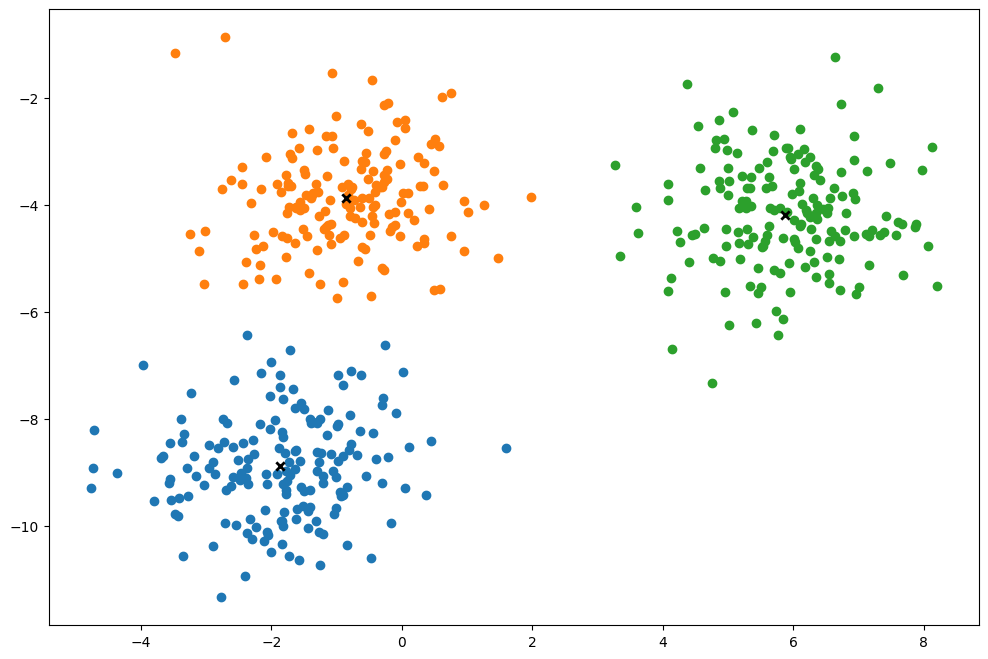

In [11]:
#K-MEANS CLUSTERING

import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

np.random.seed(42)

X, y = make_blobs(centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40)

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KMeans:
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # mean feature vector for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        # initialize centroids
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # optimization
        for _ in range(self.max_iters):
            # update clusters
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            # update centroids
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            # check if converged
            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # return cluster labels
        return self._get_cluster_labels(self.clusters)

    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx

    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))
        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)
        for point in self.centroids:
            ax.scatter(*point, marker='x', color='black', linewidth=2)
        plt.show()

clusters = len(np.unique(y))
print("Number of clusters:", clusters)

km = KMeans(K=clusters, max_iters=150, plot_steps=False)
y_pred = km.predict(X)
km.plot()

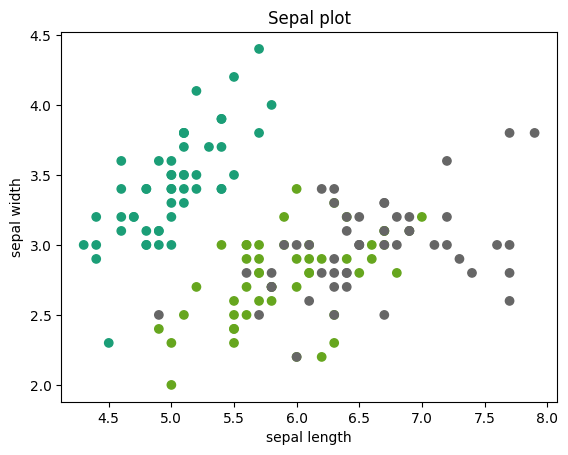

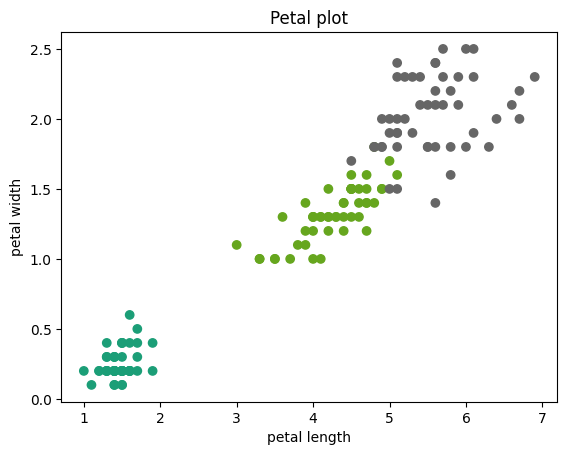

0.98


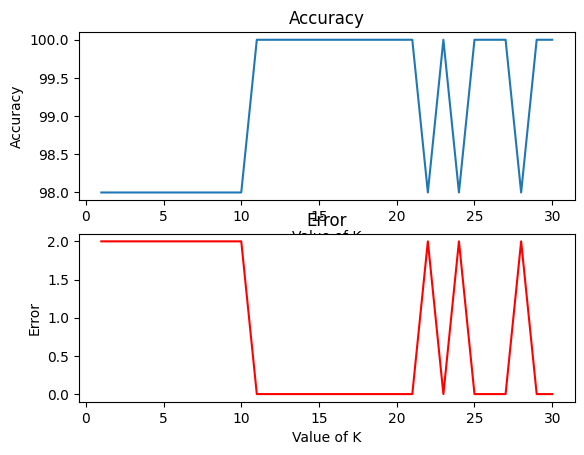

In [10]:
# K NEAREST NEIGHBOURS
from sklearn import datasets
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

iris = datasets.load_iris()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=42)

# Sepal Plot
plt.scatter(iris.data[:, 0:1], iris.data[:, 1:2], c=iris.target, cmap=plt.cm.Dark2)
plt.title('Sepal plot')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

# Petal Plot
plt.scatter(iris.data[:, 2:3], iris.data[:, 3:4], c=iris.target, cmap=plt.cm.Dark2)
plt.title('Petal plot')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

from sklearn.neighbors import KNeighborsClassifier

# Getting classifier using k = 9 and trained with training dataset
knn = KNeighborsClassifier(9)
knn.fit(X_train, y_train)

# Now testing and check the accuracy at k = 9
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

pred = knn.predict(X_test)
print(accuracy_score(y_test, pred))

# Function to compute accuracy and error for k values from 1 to 30
def compute(x_input, y_input, x_test):
    index = []
    accuracy = []
    error = []

    for K in range(30):
        K = K + 1
        neigh = KNeighborsClassifier(n_neighbors=K)
        neigh.fit(x_input, y_input)
        y_pred = neigh.predict(x_test)
        index.append(K)
        accuracy.append(accuracy_score(y_test, y_pred) * 100)
        error.append(mean_squared_error(y_test, y_pred) * 100)

    plt.subplot(2, 1, 1)
    plt.plot(index, accuracy)
    plt.title('Accuracy')
    plt.xlabel('Value of K')
    plt.ylabel('Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(index, error, 'r')
    plt.title('Error')
    plt.xlabel('Value of K')
    plt.ylabel('Error')

    plt.show()

compute(X_train, y_train, X_test)


EXPERIMENT 9- NLP PROGRAM

In [ ]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time

# Download NLTK resources
nltk.download('stopwords')

# Load stopwords and Porter stemmer
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

# Load data
data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

# Function to calculate percentage of punctuation in text
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count / (len(text) - text.count(" ")), 3) * 100

# Apply text preprocessing and feature engineering
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[['body_text', 'body_len', 'punct%']], data['label'], test_size=0.2)

# Apply TF-IDF Vectorization with custom analyzer
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['body_text'])
tfidf_train = tfidf_vect_fit.transform(X_train['body_text'])
tfidf_test = tfidf_vect_fit.transform(X_test['body_text'])

# Concatenate TF-IDF features with other numerical features
X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True), pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True), pd.DataFrame(tfidf_test.toarray())], axis=1)

# Train and evaluate Random Forest Classifier
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)
start = time.time()
rf_model = rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)
start = time.time()
y_pred = rf_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)
precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Random Forest ---- Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred == y_test).sum() / len(y_pred), 3)))

# Train and evaluate Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=150, max_depth=11)
start = time.time()
gb_model = gb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)
start = time.time()
y_pred = gb_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)
precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Gradient Boosting ---- Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred == y_test).sum() / len(y_pred), 3)))


EXPERIMENT 10- CNN MODEL

[1]


313/313 [==============================] - 26s 81ms/step - loss: 1.2755 - accuracy: 0.5362
Test Accuracy: 0.5361999869346619
313/313 [==============================] - 28s 88ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


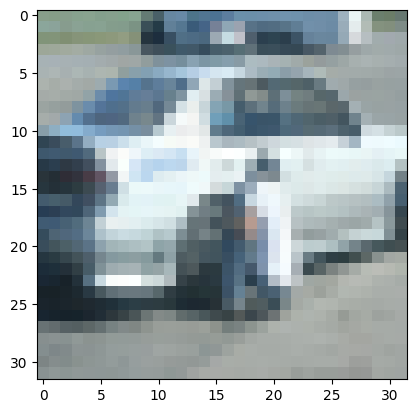

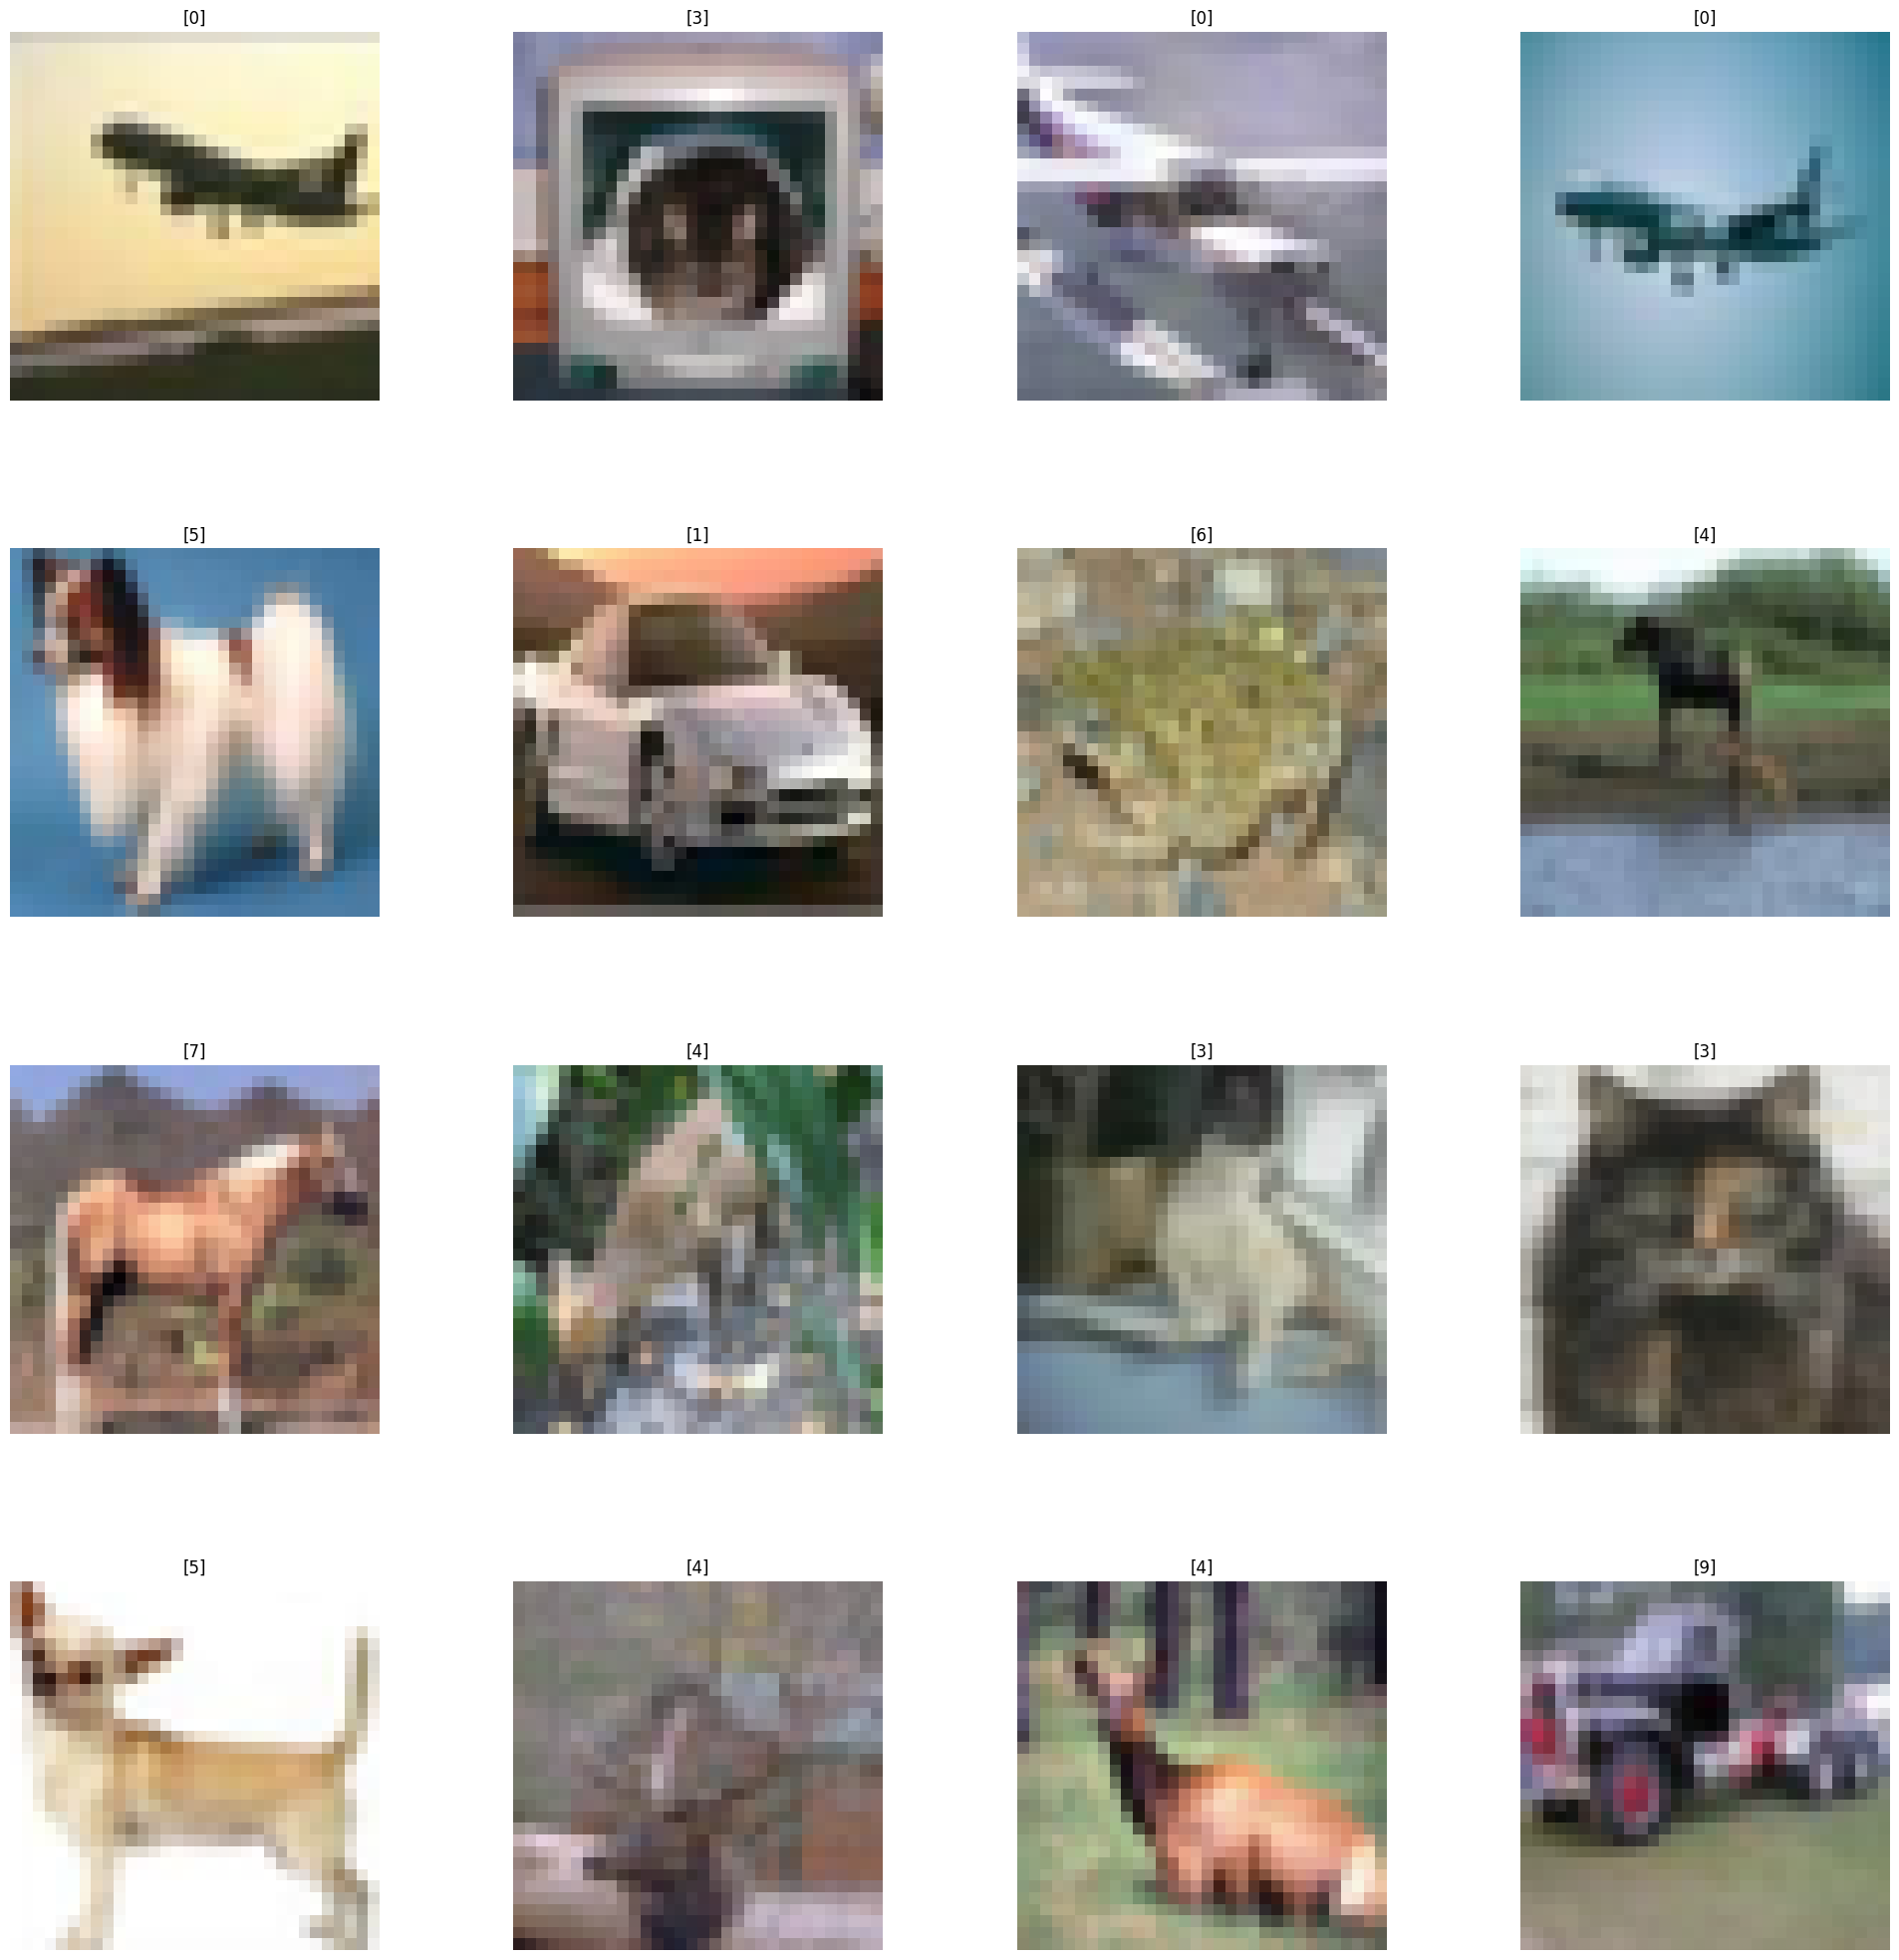

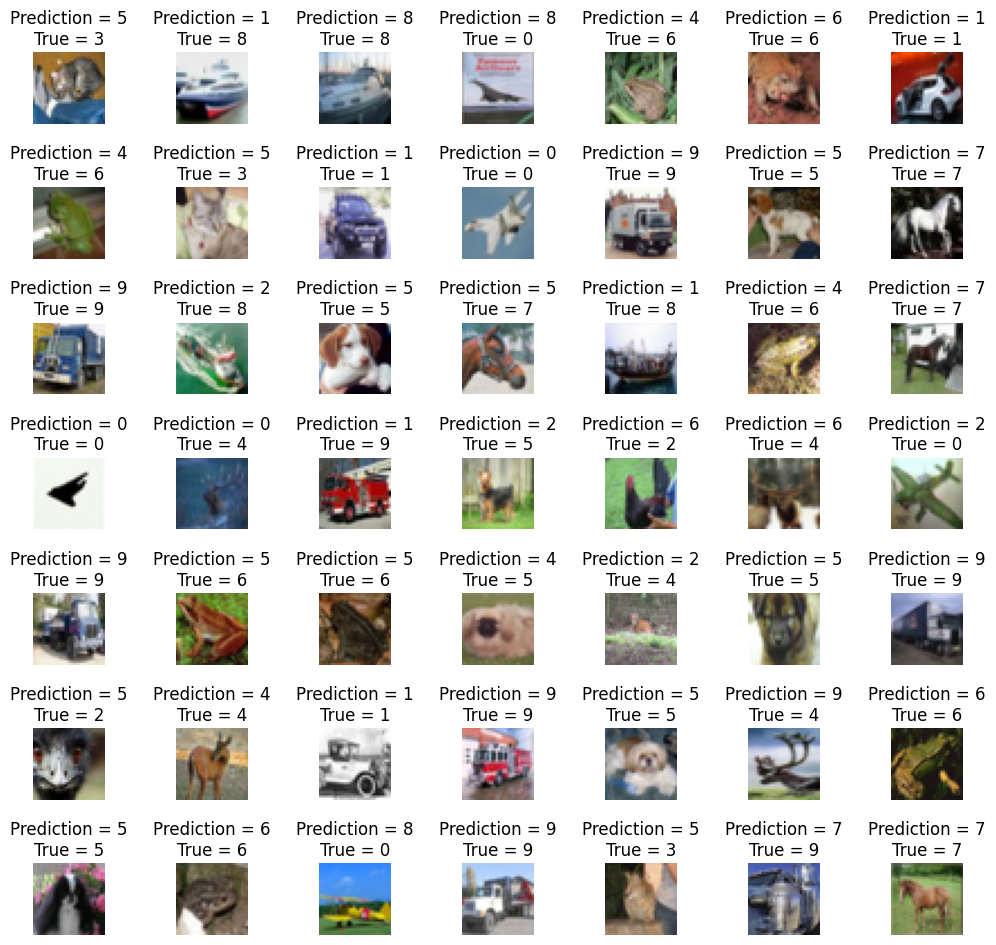

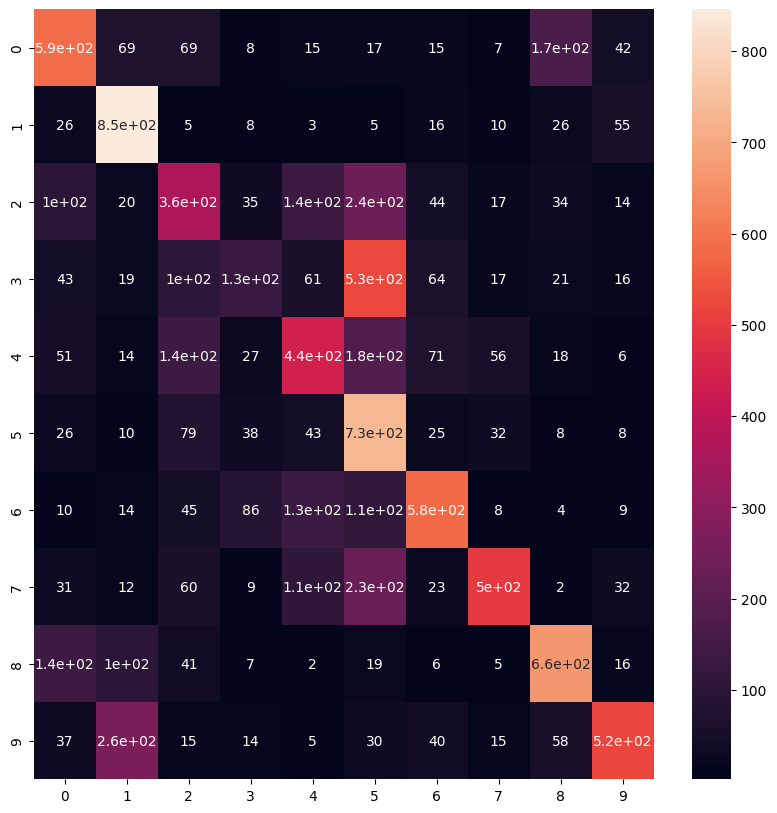

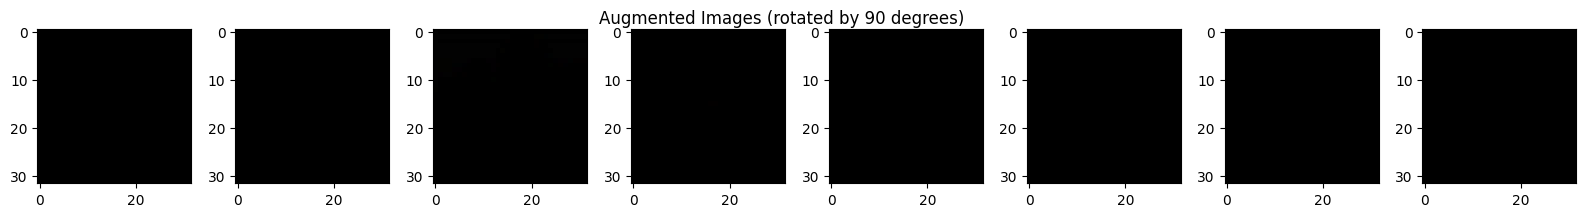

Epoch 1/2


<ipython-input-18-0f07ce68d311>:129: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size=32), epochs=2)


1563/1563 [==============================] - 594s 379ms/step - loss: 1.7125 - accuracy: 0.3778
Epoch 2/2
1563/1563 [==============================] - 567s 363ms/step - loss: 1.5933 - accuracy: 0.4216


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1919, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Display a sample image from the training set
i = 30009
plt.imshow(X_train[i])
print(y_train[i])

# Set up grid for displaying images
W_grid = 4
L_grid = 4
fig, axes = plt.subplots(L_grid, W_grid, figsize=(25, 25))
axes = axes.ravel()
n_training = len(X_train)

# Display random training images in a grid
for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)  # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

# Preprocess the data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
number_cat = 10
y_train = to_categorical(y_train, number_cat)
y_test = to_categorical(y_test, number_cat)

# Define the input shape
Input_shape = X_train.shape[1:]

# Define the CNN model architecture
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=Input_shape))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.4))
cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.4))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=1024, activation='relu'))
cnn_model.add(Dense(units=1024, activation='relu'))
cnn_model.add(Dense(units=10, activation='softmax'))

# Compile the model
cnn_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Train the model
history = cnn_model.fit(X_train, y_train, batch_size=32, epochs=1, shuffle=True)

# Evaluate the model on test data
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

# Make predictions on test data
predicted_classes = cnn_model.predict(X_test)
classes_x = np.argmax(predicted_classes, axis=1)
y_test = y_test.argmax(1)

# Display a grid of test images with predictions and true labels
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()
for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\nTrue = {}'.format(classes_x[i], y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, classes_x)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True)

# Save the trained model
directory = os.path.join(os.getcwd(), 'saved_models')
if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

# Data augmentation
n = 8
X_train_sample = X_train[:n]

# Create an image data generator with brightness augmentation
dataget_train = ImageDataGenerator(brightness_range=(1, 3))
dataget_train.fit(X_train_sample)

# Display augmented images
fig = plt.figure(figsize=(20, 2))
for x_batch in dataget_train.flow(X_train_sample, batch_size=n):
    for i in range(0, n):
        ax = fig.add_subplot(1, n, i + 1)
        ax.imshow(Image.fromarray(np.uint8(x_batch[i])))
    fig.suptitle('Augmented Images (rotated by 90 degrees)')
    plt.show()
    break  # Only display one batch of augmented images

# Further data augmentation with rotation, shift, and flip
datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)
datagen.fit(X_train)
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size=32), epochs=2)

# Evaluate the model after data augmentation
score = cnn_model.evaluate(X_test, y_test)
print('Test accuracy after augmentation:', score[1])

# Save the augmented model
model_path_augmented = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path_augmented)
